# Data Science Project
This is the notebook that is assosiated with TTDS report, and what wil be used to create all the fancy python graphs\
We first need to import the modules/libaries that we are going to use in this project

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker

Now this is done we can get on with importing both sets of data:

In [23]:
normal_flow = pd.read_csv("./Data/Normal_Flow.csv", delimiter=',')
#attack_flow=pandas.read_csv("./Data/Attack_flow.csv", delimiter=',')

# Collect data where the flow has origionated from 192.168.0.0/24
internal = normal_flow.query("sIP.str.contains('192.168.0.9')")

#normal_flow.head(3)
internal.head(3)
#attack_flow.head(3)

,sIP,dIP,sPort,dPort,protocol,packets,bytes,flags,sTime,duration,eTime,sensor
0,192.168.0.9,134.209.19.251,60532,80,6,35,2674,FSPA,2021/03/19T17:28:24.978,7.254,2021/03/19T17:28:32.232,S0
2,192.168.0.9,134.209.19.251,60524,80,6,6,749,FSPA,2021/03/19T17:28:23.929,8.304,2021/03/19T17:28:32.233,S0
4,192.168.0.9,134.209.19.251,60534,80,6,25,3096,FSPA,2021/03/19T17:28:24.981,7.261,2021/03/19T17:28:32.242,S0


## Data sanitisation
Although we have the netflow data it's not quite in the format that we want it in just yet, we need to do some conversion. Im fairly sure the way I am doing this is horriably inneffiecent but it works!

In [27]:
sanatised_internal = internal.to_numpy()
for i in range(0,len(sanatised_internal)):
    # change Bytes to KiloBytes
    sanatised_internal[i][6] = sanatised_internal[i][6]/1000
    # Extract the HH:MM:SS:fff and replace the data in the sensor column
    sanatised_internal[i][11] = sanatised_internal[i][10].split("T")[1]
# convert Numpy Array back to Panads Data 
sanatised_internal = pd.DataFrame(sanatised_internal,columns=["sIP","dIP","sPort","dPort","protocol","packets","Kilobytes","flags","stime","duration","eTime","TimeStamp"])
sanatised_internal = sanatised_internal.sort_values("TimeStamp")
sanatised_internal.head(5)

,sIP,dIP,sPort,dPort,protocol,packets,Kilobytes,flags,stime,duration,eTime,TimeStamp
49,192.168.0.9,239.255.255.250,53089,1900,17,4,0.78,NaN,2021/03/19T17:28:16.645,3.003,2021/03/19T17:28:19.648,17:28:19.648
50,192.168.0.9,194.168.4.100,45625,53,17,1,0.054,NaN,2021/03/19T17:28:23.907,0.021,2021/03/19T17:28:23.928,17:28:23.928
52,192.168.0.9,194.168.4.100,47466,53,17,1,0.054,NaN,2021/03/19T17:28:24.192,0.018,2021/03/19T17:28:24.210,17:28:24.210
53,192.168.0.9,194.168.4.100,37789,53,17,1,0.053,NaN,2021/03/19T17:28:25.242,0.016,2021/03/19T17:28:25.258,17:28:25.258
54,192.168.0.9,194.168.4.100,36783,53,17,1,0.066,NaN,2021/03/19T17:28:25.300,0.072,2021/03/19T17:28:25.372,17:28:25.372


## Fancy Graphs time!
Now we have the data in the format that we want we can have alook at some of the visulasations
### 1 - Top TCP Port

Text(0, 0.5, 'Frequency')

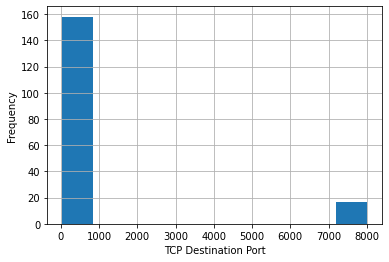

In [28]:
#plt.hist(internal[internal["protocol"]=="6"]["dPort"])
sanatised_internal.loc[sanatised_internal["protocol"] == 6]['dPort'].hist()
plt.xlabel('TCP Destination Port')
plt.ylabel('Frequency')

## 2 - Top used UDP Port Numbers from any device on 192.168.0.0

Text(0, 0.5, 'Frequency')

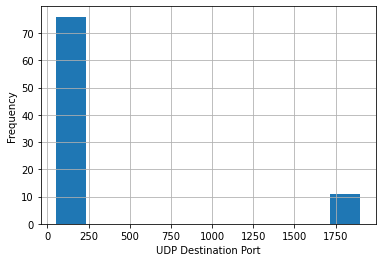

In [29]:
#plt.hist(internal[internal["protocol"]=="6"]["dPort"])
sanatised_internal.loc[sanatised_internal["protocol"] == 17]['dPort'].hist()
plt.xlabel('UDP Destination Port')
plt.ylabel('Frequency')

## 3- Number of packets and bytes at a time stamp
The complex stuff

Text(0, 0.5, 'Kilobytes')

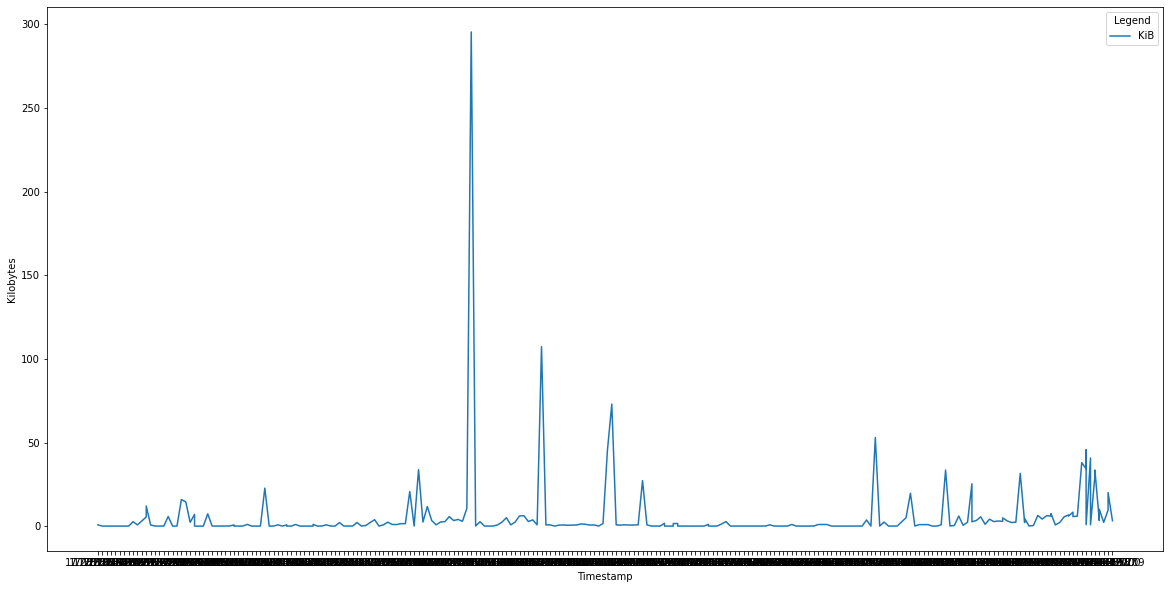

In [68]:
plt.rcParams["figure.figsize"] = (20,10)
plt.plot(sanatised_internal["TimeStamp"],sanatised_internal["Kilobytes"],label='KiB')
#plt.plot(sanatised_internal["TimeStamp"],sanatised_internal["packets"],label='Packets')
plt.legend(loc='best',title="Legend")
plt.xlabel('Timestamp')
plt.ylabel('Kilobytes')